In [65]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 

In [145]:
df =pd.read_csv('life.csv')
df

,Age,Income,Spending,Insurance
0,25,72,40,Life
1,54,35,20,Health
2,23,40,28,Life
3,36,58,30,Health
4,41,61,41,Health


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        15 non-null     int64 
 1   Income     15 non-null     int64 
 2   Insurance  15 non-null     object
 3   pred       15 non-null     object
dtypes: int64(2), object(2)
memory usage: 612.0+ bytes


In [183]:
df.describe()

,Age,Income
count,15.000000,15.000000
mean,40.266667,44603.266667
std,15.082945,12722.377234
min,20.000000,29638.000000
25%,29.000000,34541.500000
50%,40.000000,39425.000000
75%,47.500000,51427.500000
max,72.000000,70282.000000


In [148]:
# features = ['Age', 'Income','Spending']

In [149]:
# x = df[features]

In [150]:
x = df.drop('Insurance', axis='columns')

In [151]:
y =df['Insurance']

In [152]:
model = KNeighborsClassifier(n_neighbors =3)

In [153]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [154]:
model.predict([[28,60,29]])


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Health'], dtype=object)

In [156]:
df['pred'] = model.predict(x)
df


,Age,Income,Spending,Insurance,pred
0,25,72,40,Life,Health
1,54,35,20,Health,Health
2,23,40,28,Life,Health
3,36,58,30,Health,Health
4,41,61,41,Health,Health


In [157]:
# N(3,6)
# (x,y)
# A(1,1)-Life
# B(2,1)-Health
# C(2,1)-Life
# D(3,5)-Life
# E(5,2)-Health
# F(7,3) -Health
# N- Neighbors =1

# Euclidean Distance--> 
# NA--> ((3-1)^2+(6-1)^2)^(1/2)
# NB--> ((3-3)^2+(6-2)^2)^(1/2)

In [158]:
df = pd.read_csv('health.csv')
df

,Age,Income,Insurance
0,25,35197,Life
1,54,33886,Health
2,23,38593,Life
3,36,53349,Health
4,41,64870,Health
5,72,70282,Life
6,35,29638,Health
7,40,30856,Life
8,58,39425,Health
9,61,49506,Health


In [159]:
x =df.drop('Insurance', axis='columns')
y = df['Insurance']

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn= KNeighborsClassifier(n_neighbors =5)

In [162]:
knn.fit(x,y)

KNeighborsClassifier()

In [163]:
knn.predict([[29,63258]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Health '], dtype=object)

In [164]:
df['pred'] =  knn.predict(x)
df.sample()

,Age,Income,Insurance,pred
14,41,58325,Health,Health


In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(df['pred'], df['Insurance'])

0.6

<Axes: xlabel='Age', ylabel='Income'>

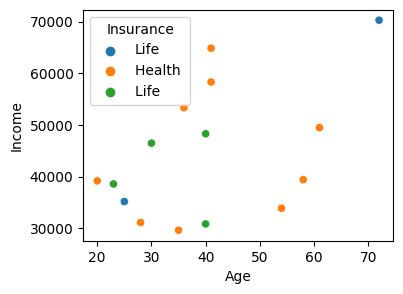

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
sns.scatterplot(x ='Age', y='Income', data=df, hue='Insurance')

In [186]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['Insurance'], df['pred'])
cm

array([[9, 0, 0],
       [2, 0, 0],
       [4, 0, 0]], dtype=int64)

<Axes: >

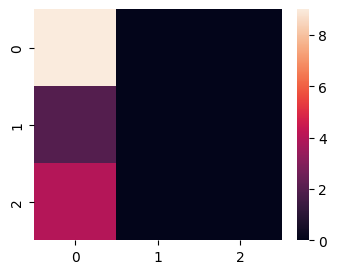

In [187]:
plt.figure(figsize=(4,3))
sns.heatmap(cm)

In [208]:
x.shape

(5,)

In [209]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()

In [210]:
df1 = df.drop(['Insurance' , 'pred'], axis = 'columns')

In [211]:
a = scal.fit_transform(df1)

In [212]:
a_d = pd.DataFrame(a, columns =df1.columns)
a_d.sample()

,Age,Income
2,0.057692,0.220328


In [213]:
# standardization - >ML  (regression , classification)

from sklearn.preprocessing import StandardScaler 

In [214]:
s =StandardScaler()

In [215]:
b =s.fit_transform(df1)

In [216]:
pd.DataFrame(b,columns = df1.columns).sample()

,Age,Income
11,-1.390842,-0.440426


In [217]:
df1

,Age,Income
0,25,35197
1,54,33886
2,23,38593
3,36,53349
4,41,64870
5,72,70282
6,35,29638
7,40,30856
8,58,39425
9,61,49506


In [218]:
import matplotlib.pyplot as plt
import numpy as np

In [219]:
def gradie(x,y):
    m_curr = c_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y, marker='*', linewidth=5)
    for i in range(10000):
        y_pred = m_curr*x +c_curr
        plt.plot(x,y_pred, color='y')
        md = -(2/n)*sum(x*(y-y_pred))
        cd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr-rate*md
        c_curr= c_curr-rate*cd

        

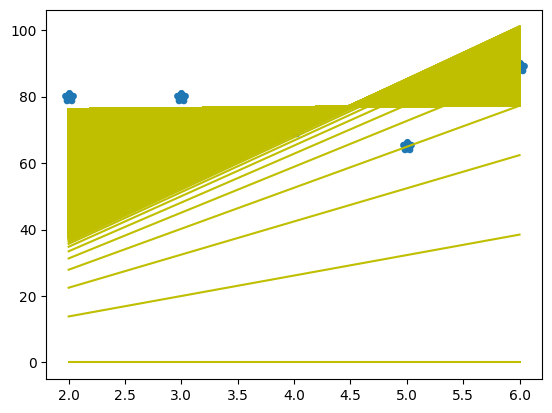

In [220]:
x = np.array([2,3,4,5,6])
y =np.array([80,80,70,65,89])
gradie(x,y)

# SVM

In [296]:

import pandas as pd
from sklearn.datasets import load_iris

In [224]:
iris = load_iris()

In [227]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [228]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [229]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [230]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [234]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [235]:
df[df.target== 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [236]:
df[df.target== 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [298]:
df['flower_names']=df.target.apply(lambda x:iris.target_names[x])

In [299]:
df[df.target== 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [300]:
df[df.target== 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [301]:
df[df.target== 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [302]:
df[45:50]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa


In [303]:
df1 = df[:50]
df2 = df[50:100]
df3 = df[100:]

In [304]:
import matplotlib.pyplot as plt

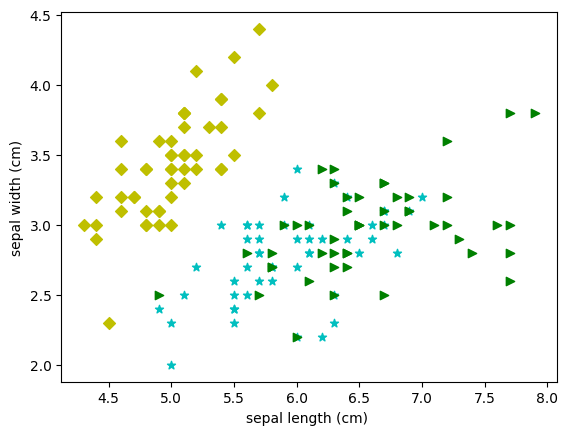

In [305]:
plt.xlabel('sepal length (cm) ')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], marker='D',color='y')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], marker='*',color='c')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'], marker='>',color='g')


In [306]:
from sklearn.model_selection import train_test_split

In [307]:
x =df.drop(['target', 'flower_names'], axis='columns')
y =df.target

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [309]:
len(x_train)

112

In [310]:
len(x_test)

38

In [311]:
from sklearn.svm import SVC

In [312]:
model = SVC()

In [313]:
model.fit(x_train, y_train)

SVC()

In [314]:
model.score(x_test, y_test)

0.9736842105263158

In [315]:
model.predict([[5.3,3.7,1.2,0.2]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
https://forms.office.com/r/4he0XH7LMS